## Des requins et des sardines.

On a considéré le modèle qui décrit un système proie - prédateur. Si $x(t)$ désigne le nombre de proies, et $y(t)$ le nombre de prédateurs, le modèle de Lotka - Volterra s'écrit: $$\left\{ \begin{array}{ccc}x' &= &ax-bxy\\ y' & = & dxy-cy\end{array}\right.$$ où $a,b,c,d>0$.

Il s'agit d'un système non-linéaire, mais on peut quand même dire quelque chose au sujet de la relatin entre $x(t)$ et $y(t)$. On montre que $$\frac{y^a}{e^{by}}\frac{x^c}{e^{dx}} = K$$ où $K$ est donnée par les conditions initiales. Cette équation décrit une courbe. Ci-bas on la trace en prennant $x_0 = 2.2$ et $y(0) = 5.5$

In [1]:
a=3
b=1
c=1
d=0.1

In [2]:
K = (5.5^a)*(2.2^c)*e^(d*2.2-b*5.5)
K

1.86395698089772

### Le plan de phase
Plutôt que dessiner les deux fonctions $x(t)$ et $y(t)$ en fonction de $t$, on peut faire une courbe paramétrique $\{(x(t),y(t))| t\in \mathbb{R}\}$. C'est le **diagramme de phase**.

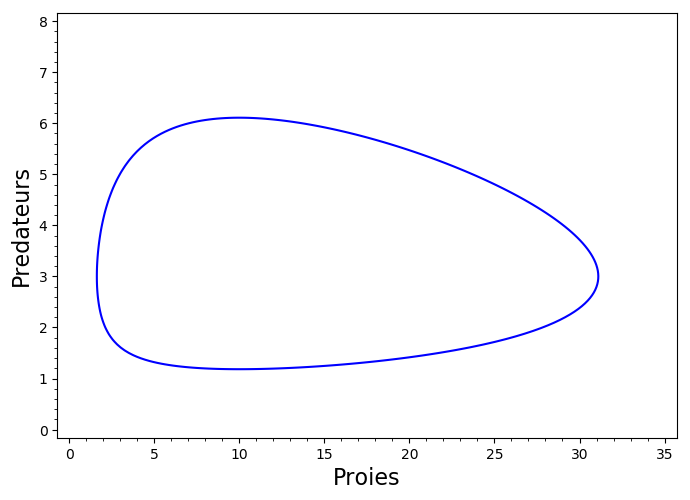

In [3]:
var('x,y')
C= implicit_plot((y^a)*(x^c)*e^(-d*x-b*y)-K, (x,0,35),(y,0,8),color="blue")
show(C,aspect_ratio =3,figsize=7, axes_labels=['Proies','Predateurs']  )

Comme avant, on peut aussi tracer le champ de vecteurs, ça nous dit en quel sens la courbe est parcourue.

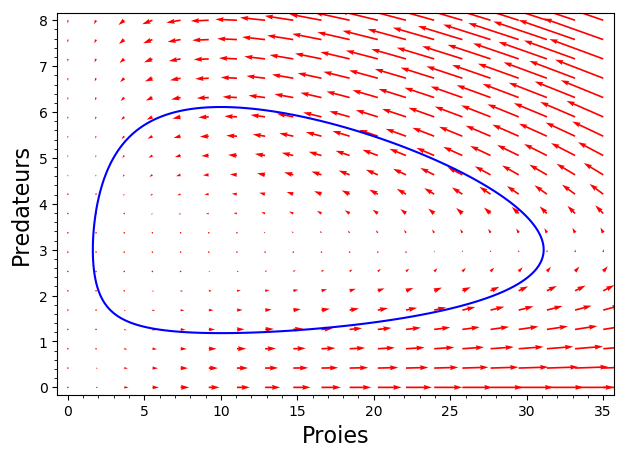

In [4]:
F=plot_vector_field([a*x - b *x*y, -c*y + d*x*y],(x,0,35),(y,0,8), color="red")
show(F+C, aspect_ratio =3,figsize=7, axes_labels=['Proies','Predateurs'] )

Le système est non linéaire, de sorte qu'on ne peut pas le résoudre (facilement). Par contre, on peut demander à SAGE de le faire numériquement. La commande `desolve_system_rk4` fait el boulot. Ici `rk4` dit que c'est la méthode de Runge-Kutta d'ordre 4 qui est utilisée, chose à voir dans vos cours de méthodes numériques.

Cette commande produit une liste qui, dans notre cas contient des triplets $[t,x(t),y(t)]$. En manipulant ces listes on peut produire les courbes $(t,x(t))$, $(t,y(t))$, ou encore, dans le plan de phase, la courbe $(x(t),y(t))$.

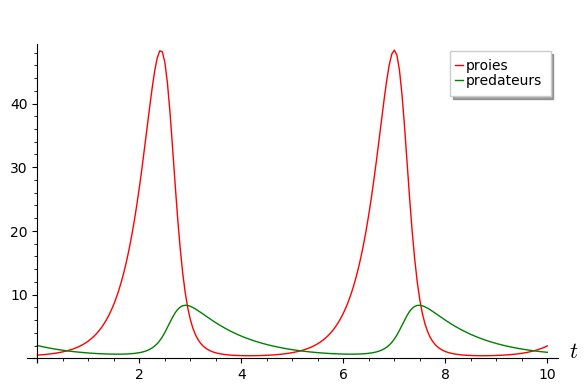

In [4]:
from sage.calculus.desolvers import desolve_system_rk4
x,y,t=var('x y t')
P=desolve_system_rk4([a*x - b *x*y, -c*y + d*x*y],[x,y],ics=[0,0.5,2],ivar=t,step=0.05,end_points=10)
X=[ [i,j] for i,j,k in P]
LX=list_plot(X, plotjoined=True, color="red",legend_label="proies")
Y=[ [i,k] for i,j,k in P]
LY=list_plot(Y, plotjoined=True,color="green", legend_label="predateurs", axes_labels=['$t$',' '])
show(LX + LY)

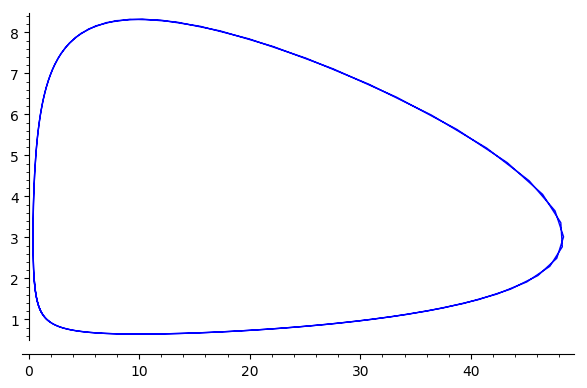

In [6]:
Phase = [ [j,k] for i,j,k in P]
LP = list_plot(Phase, plotjoined=True)
show(LP)